In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as  pd
import  seaborn as  sns
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm_notebook
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("A_Z Handwritten Data.csv")

In [6]:
df.shape

(372450, 785)

In [7]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,372450.0,13.523490,6.740824,0.0,10.0,14.0,18.0,25.0
0.1,372450.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.2,372450.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.3,372450.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.4,372450.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
0.644,372450.0,0.000596,0.319820,0.0,0.0,0.0,0.0,194.0
0.645,372450.0,0.000618,0.208942,0.0,0.0,0.0,0.0,103.0
0.646,372450.0,0.000690,0.335227,0.0,0.0,0.0,0.0,198.0
0.647,372450.0,0.000239,0.134852,0.0,0.0,0.0,0.0,82.0


In [9]:
df.dtypes

0        int64
0.1      int64
0.2      int64
0.3      int64
0.4      int64
         ...  
0.644    int64
0.645    int64
0.646    int64
0.647    int64
0.648    int64
Length: 785, dtype: object

In [10]:
df["0"].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [11]:
df.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [12]:
df.duplicated().sum()

171355

In [13]:
X = df.drop('0', axis = 1)
y = df['0']
print(X.shape)
print(y.shape)

(372450, 784)
(372450,)


In [14]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2,random_state=42)


In [15]:
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print(train_x.shape)
print(test_x.shape)

(297960, 28, 28)
(74490, 28, 28)


In [16]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',
    15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

In [17]:
count=y.value_counts().sort_index().values

In [18]:
count

array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
        8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
       48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076],
      dtype=int64)

In [19]:
alphabets = list((word_dict.values()))
alphabets

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

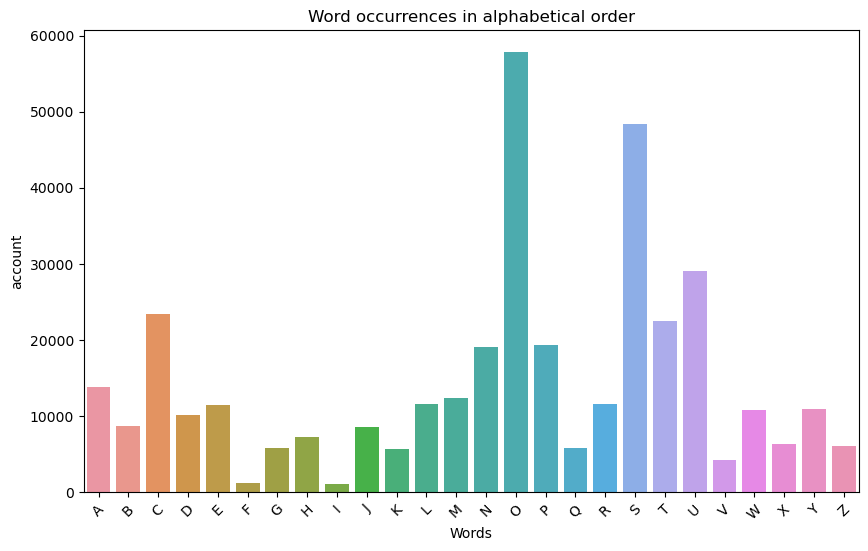

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=alphabets, y=count)
plt.xlabel('Words')
plt.ylabel('account')
plt.title('Word occurrences in alphabetical order')
plt.xticks(rotation=45)
plt.show()

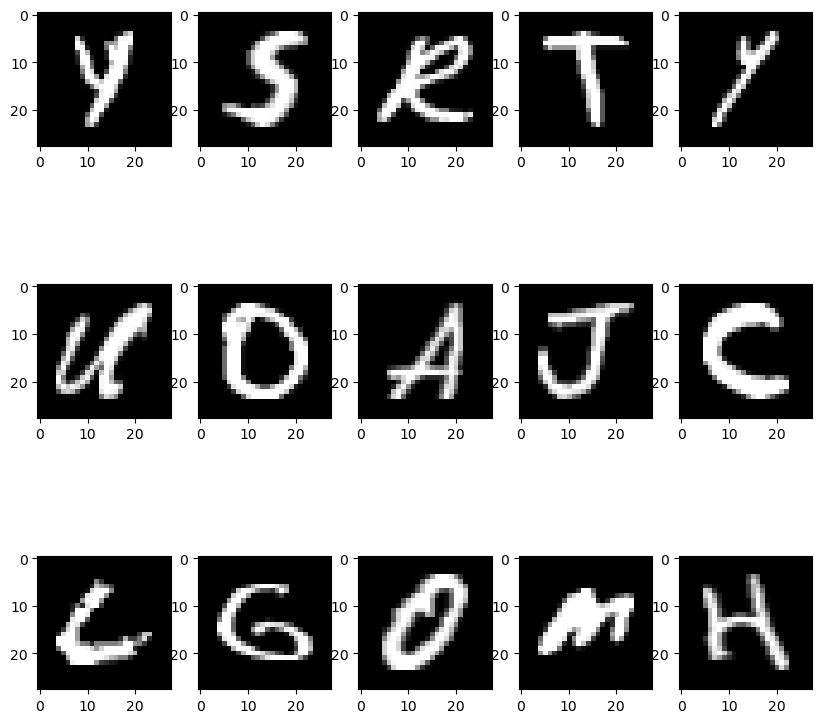

In [21]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,5, figsize = (10,10))
axes = ax.flatten()
for i in range(15):
    axes[i].imshow(shuff[i], cmap="gray")
plt.show()

In [22]:
test_x = np.reshape(test_x, (test_x.shape[0], 28,28,1))
train_x=np.reshape(train_x,(train_x.shape[0],28,28,1))
print(train_x.shape)
print(test_x.shape)

(297960, 28, 28, 1)
(74490, 28, 28, 1)


In [23]:
train_ycategorical = to_categorical(train_y , num_classes=26)
print("New shape of train labels: ", train_ycategorical.shape)

test_ycategorical = to_categorical(test_y , num_classes=26)
print("New shape of test labels: ", test_ycategorical.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [24]:
my_model = Sequential()

my_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())


my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(26, activation = "softmax"))

In [33]:
my_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = my_model.fit(train_x, train_ycategorical, validation_data=(test_x, test_ycategorical), epochs=10)


Epoch 1/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 249s 26ms/step - accuracy: 0.9830 - loss: 0.0622 - val_accuracy: 0.9827 - val_loss: 0.0649
Epoch 2/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 255s 26ms/step - accuracy: 0.9853 - loss: 0.0532 - val_accuracy: 0.9846 - val_loss: 0.0643
Epoch 3/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 253s 27ms/step - accuracy: 0.9861 - loss: 0.0514 - val_accuracy: 0.9831 - val_loss: 0.0688
Epoch 4/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 277s 30ms/step - accuracy: 0.9877 - loss: 0.0470 - val_accuracy: 0.9855 - val_loss: 0.0600
Epoch 6/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 304s 33ms/step - accuracy: 0.9885 - loss: 0.0440 - val_accuracy: 0.9844 - val_loss: 0.0803
Epoch 7/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 318s 34ms/step - accuracy: 0.9882 - loss: 0.0463 - val_accuracy: 0.9856 - val_loss: 0.0709
Epoch 8/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 317s 34ms/step - accuracy: 0.9885 - loss: 0.0460 - val_accuracy: 0.9866 - val_loss: 0.0618
Epoch 9/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 335s 36ms/step - accuracy: 

In [34]:
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,536 (1.57 MB)

 Trainable params: 137,178 (535.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 274,358 (1.05 MB)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix



val_predictions = my_model.predict(test_x)
val_predictions_classes = np.argmax(val_predictions, axis=1)

# Calcul de la précision et de la matrice de confusion
accuracy = accuracy_score(test_y, val_predictions_classes)
conf_matrix = confusion_matrix(test_y, val_predictions_classes)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step


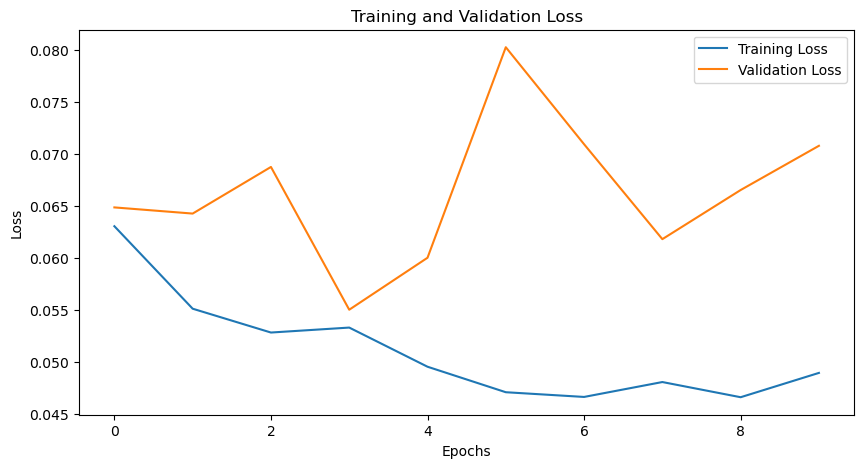

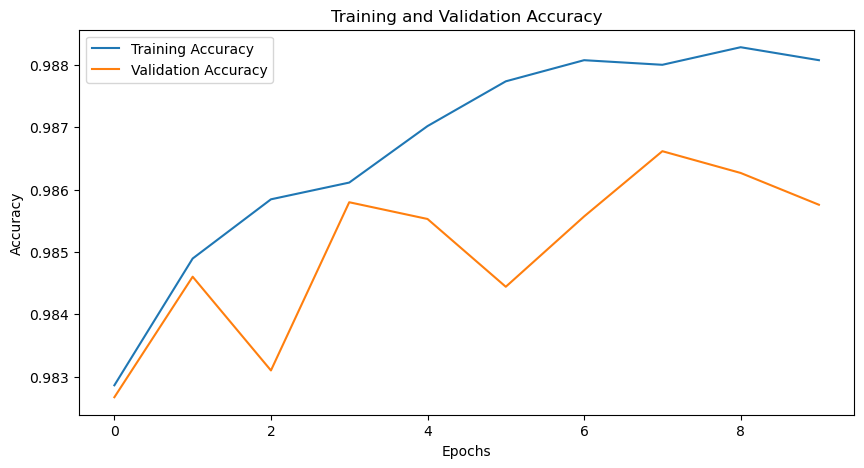

In [36]:
# Obtenez les historiques de perte et de précision
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Tracez les courbes de perte
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Tracez les courbes de précision
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


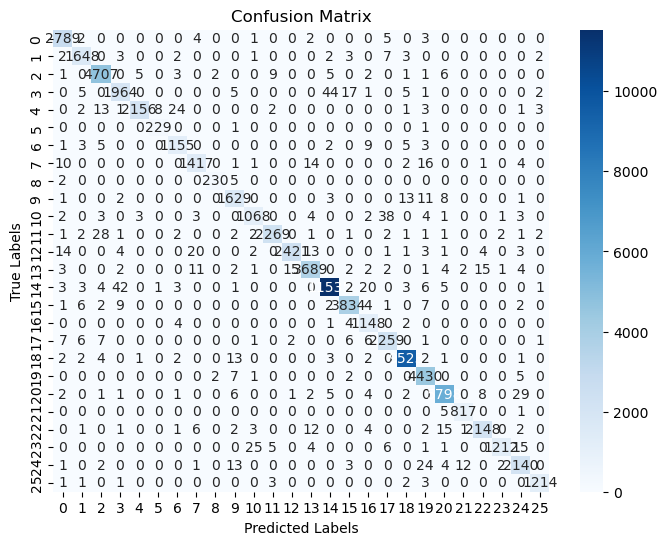

Accuracy on test data: 0.985756477379514


In [37]:
# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Affichage de la précision
print(f'Accuracy on test data: {accuracy}')


2328/2328 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step


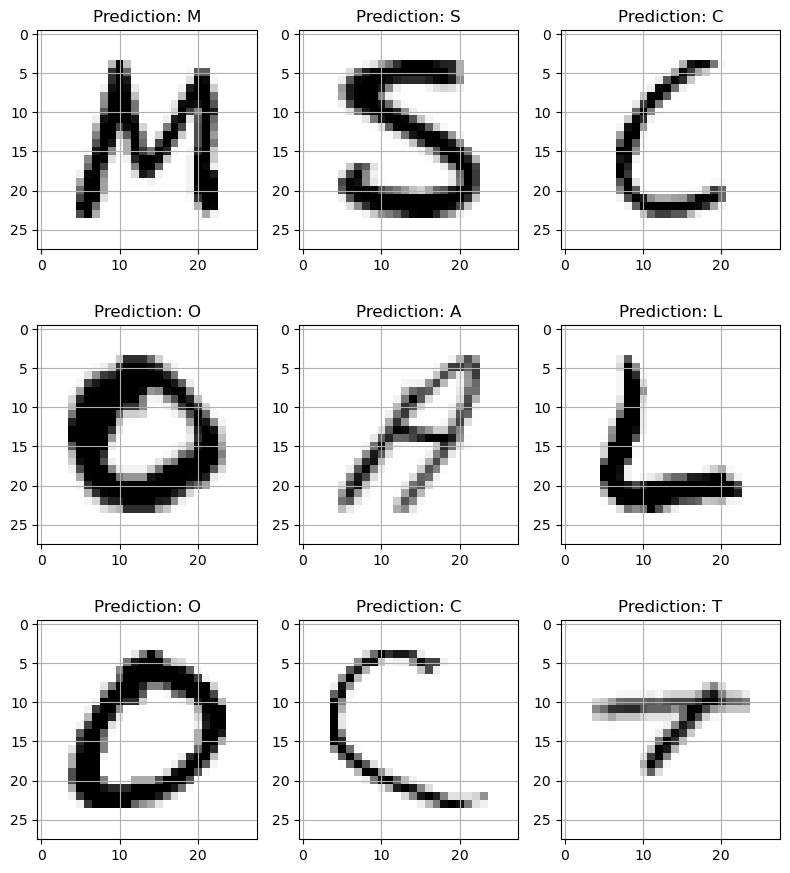

In [38]:
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()
predictions = my_model.predict(test_x)

for i, ax in enumerate(axes):
   
    img = np.reshape(test_x[[i]], (28, 28))
    ax.imshow(img.squeeze(), cmap="Greys")  # Use squeeze() to remove the single-dimensional entries from the shape of the array
    pred = np.argmax(predictions[i])
    ax.set_title("Prediction: " +word_dict[pred])  # Convert pred to str for the title
    ax.grid()

plt.tight_layout()
plt.show()
